In [11]:
import pandas as pd
import numpy as np
import librosa 
import IPython.display as ipd #palying audio
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import os
import csv
import soundfile
import sklearn
from matplotlib.colors import Normalize
import glob
from scipy.stats import kurtosis, skew

In [12]:
path = os.chdir('C:/Users/makye/OneDrive/Documents/Career/BeCode/study/Data_preprocessing/audioProcessing/-6_dB_pump')
print(os.getcwd())

C:\Users\makye\OneDrive\Documents\Career\BeCode\study\Data_preprocessing\audioProcessing\-6_dB_pump


In [21]:
#Individual functions for targeted features
#Chromagram 

file = ('pump/id_00/normal/00000000.wav')

def getfeature(file):
    
    wave , sr = librosa.load(file)
    
    chroma= librosa.feature.chroma_stft(y=wave, sr=sr)
    chroma_stft = (np.mean(chroma), np.amin(chroma), np.amax(chroma), np.std(chroma), 
                   np.median(chroma), skew(chroma), kurtosis(chroma))
    
    rmse = np.mean(librosa.feature.rms(y=wave))
    rms_f = (np.mean(rmse), np.amin(rmse), np.amax(rmse), np.std(rmse), 
                   np.median(rmse), skew(rmse), kurtosis(rmse))
    
    spec = np.mean(librosa.feature.spectral_centroid(y=wave, sr=sr))
    spec_cent = (np.mean(spec), np.amin(spec), np.amax( spec), np.std(spec), 
                   np.median(spec), skew(spec), kurtosis(spec))
    
    
    specb = np.mean(librosa.feature.spectral_bandwidth(y=wave, sr=sr))
    spec_bw = (np.mean(specb), np.amin(specb), np.amax( specb), np.std(specb), 
                   np.median(specb), skew(specb), kurtosis(specb))
    
    roll = np.mean(librosa.feature.spectral_rolloff(y=wave, sr=sr))
    rolloff = (np.mean(roll), np.amin(roll), np.amax(roll), np.std(roll), 
                   np.median(roll), skew(roll), kurtosis(roll))
    
    
    zcr = np.mean(librosa.feature.zero_crossing_rate(wave))
    zcrf = (np.mean(zcr), np.amin(zcr), np.amax(zcr), np.std(zcr), 
                   np.median(zcr), skew(zcr), kurtosis(zcr))
    
    mfcc = np.mean(librosa.feature.mfcc(y=wave, sr=sr))
    mfcc_f = (np.mean(mfcc), np.amin(mfcc), np.amax(mfcc), np.std(mfcc), 
                   np.median(mfcc), skew(mfcc), kurtosis(mfcc))
    
    list_features = (chroma_stft, rms_f, spec_cent, spec_bw, rolloff, zcrf, mfcc_f)
    
    feature_matrix=np.array([])
    # use np.hstack to stack our feature arrays horizontally to create a feature matrix
    feature_matrix = np.hstack((list_features))

    return feature_matrix
    
getfeature(file)
   

array([0.6838178, 0.1081696, 1.0, 0.19071972, 0.67905575,
       array([ 1.4589564 ,  1.1401306 ,  0.562652  , -0.7946522 ,  0.1037738 ,
              -0.20688862,  0.15134615,  1.6590216 ,  0.812414  ,  0.3500583 ,
               1.3176297 ,  0.362319  ,  0.574456  ,  1.0041809 ,  1.1330125 ,
               0.48634875,  0.36155882,  0.49591342,  0.921721  ,  1.242577  ,
              -0.02038352,  1.6390375 ,  0.5553373 ,  0.05472796,  0.65563345,
               0.3436942 , -0.1519822 , -0.0924015 , -0.02494319,  1.6383736 ,
               1.500361  , -0.17396413,  0.33610657,  0.51801765,  0.38915515,
               2.1091092 ,  1.4500873 ,  0.58706206,  0.3145632 ,  0.7302618 ,
               0.67891717,  1.0465579 ,  0.5287183 ,  1.2751873 ,  0.05300437,
               0.09398233,  0.538484  ,  1.978721  ,  1.7248415 , -0.65802526,
              -0.02918115,  0.82928514,  1.0367556 ,  1.0104032 ,  1.2019241 ,
               0.06823796,  1.2019967 , -0.6419146 ,  0.13260771,  0.6509

In [34]:
#load our entire dataset and compute the features of each audio file

def load_data():
    
    X,y=[],[]
    
    count = 0
    holder = ['normal', 'abnormal']
    for i in holder:
        v = f'pump/id_*/{i}/*.wav'
        if i == 'normal':
            target = 0
        else:
            target = 1
            
    
        for file in glob.glob(v):
            file_name=os.path.basename(file)
            features = getfeature(file)
            X.append(features)
            y.append(target)
            count += 1
            
        # '\r' + end='' results in printing over same line
        print('\r' + f' Processed {count}/{4205} audio samples',end=' ')
        
    # Return arrays to plug into sklearn's cross-validation algorithms
    return np.array(X), np.array(y)


In [35]:
features, target = load_data()

 Processed 4205/4205 audio samples 

In [36]:

print(f'\nAudio samples represented: {features.shape[0]}')
print(f'Numerical features extracted per sample: {features.shape[1]}')
features_df = pd.DataFrame(features) 
features_df


Audio samples represented: 4205
Numerical features extracted per sample: 7


,0,1,2,3,4,5,6
0,0.683818,0.007669,2433.537472,1957.422076,4730.534968,0.179409,-10.155997
1,0.583996,0.009814,1412.293746,1658.702837,3063.310479,0.065639,-7.972489
2,0.645543,0.010243,1423.724605,1632.069169,3048.746839,0.068486,-7.616875
3,0.334817,0.009651,1709.416551,1866.795276,3802.608793,0.075970,-10.122954
4,0.363110,0.009203,1616.372450,1744.983455,3393.353031,0.083700,-10.595860
...,...,...,...,...,...,...,...
4200,0.411911,0.015026,1521.941783,1742.308099,3247.017179,0.073028,-8.619775
4201,0.409179,0.014146,1554.958873,1758.206383,3312.915775,0.077073,-9.545607
4202,0.436421,0.014704,1448.564556,1718.393349,3093.736745,0.063882,-7.394621
4203,0.459096,0.014969,1395.520341,1667.049818,2953.046490,0.065193,-7.390283


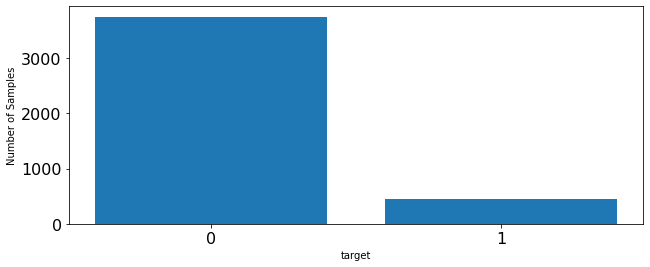

In [37]:
#Imbalances in the target dataset

# plot target
plt.figure(figsize=(35,4))
plt.subplot(1,3,1)

#np.unique returns ordered list of unique elements and count of each element
target_list, count = np.unique(target, return_counts=True)
plt.bar(x=range(2), height=count)
plt.xticks(ticks=range(2), labels = [target for target in target_list],fontsize=10)
plt.xlabel('target')
plt.tick_params(labelsize=16)
plt.ylabel('Number of Samples')
plt.show()

In [42]:
# Adding target to features dataframe
features_df['target'] = target.tolist()

features_df

,0,1,2,3,4,5,6,target
0,0.683818,0.007669,2433.537472,1957.422076,4730.534968,0.179409,-10.155997,0
1,0.583996,0.009814,1412.293746,1658.702837,3063.310479,0.065639,-7.972489,0
2,0.645543,0.010243,1423.724605,1632.069169,3048.746839,0.068486,-7.616875,0
3,0.334817,0.009651,1709.416551,1866.795276,3802.608793,0.075970,-10.122954,0
4,0.363110,0.009203,1616.372450,1744.983455,3393.353031,0.083700,-10.595860,0
...,...,...,...,...,...,...,...,...
4200,0.411911,0.015026,1521.941783,1742.308099,3247.017179,0.073028,-8.619775,1
4201,0.409179,0.014146,1554.958873,1758.206383,3312.915775,0.077073,-9.545607,1
4202,0.436421,0.014704,1448.564556,1718.393349,3093.736745,0.063882,-7.394621,1
4203,0.459096,0.014969,1395.520341,1667.049818,2953.046490,0.065193,-7.390283,1


In [44]:
#CSV dataFrame

def createCsv(df):
    

    df.to_csv('pump/-6dbpump_features_martin1.csv', index=False)
    
createCsv(features_df)